In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


# Check Data

In [ ]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

earliest_cr_line,issue_d : need to change dtype to datetime

In [ ]:
#Change Dtype of earliest_cr_line and issue_d
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y', errors='coerce')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y', errors='coerce')


In [ ]:
# Check missing value
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Total Missing': missing_values, 'Percent': missing_percent})
missing_data.head(10)

,Total Missing,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1756,0.443401
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692
installment,0,0.000000
int_rate,0,0.000000
term,0,0.000000
grade,0,0.000000


Have a row that contains all null => drop

In [ ]:
## Check duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check describe
df.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,2014-02-02 15:57:58.045602560,17.379514,1998-05-03 09:34:15.062495488,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
min,500.000000,5.320000,16.080000,0.000000e+00,2007-06-01 00:00:00,0.000000,1944-01-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,2013-05-01 00:00:00,11.280000,1994-10-01 00:00:00,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,2014-04-01 00:00:00,16.910000,1999-09-01 00:00:00,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,2015-03-01 00:00:00,22.980000,2003-04-01 00:00:00,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,2016-12-01 00:00:00,9999.000000,2013-10-01 00:00:00,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000
std,8357.441341,4.472157,250.727790,6.163762e+04,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174


# EDA

## Categorical Data



Loan Status (Target)

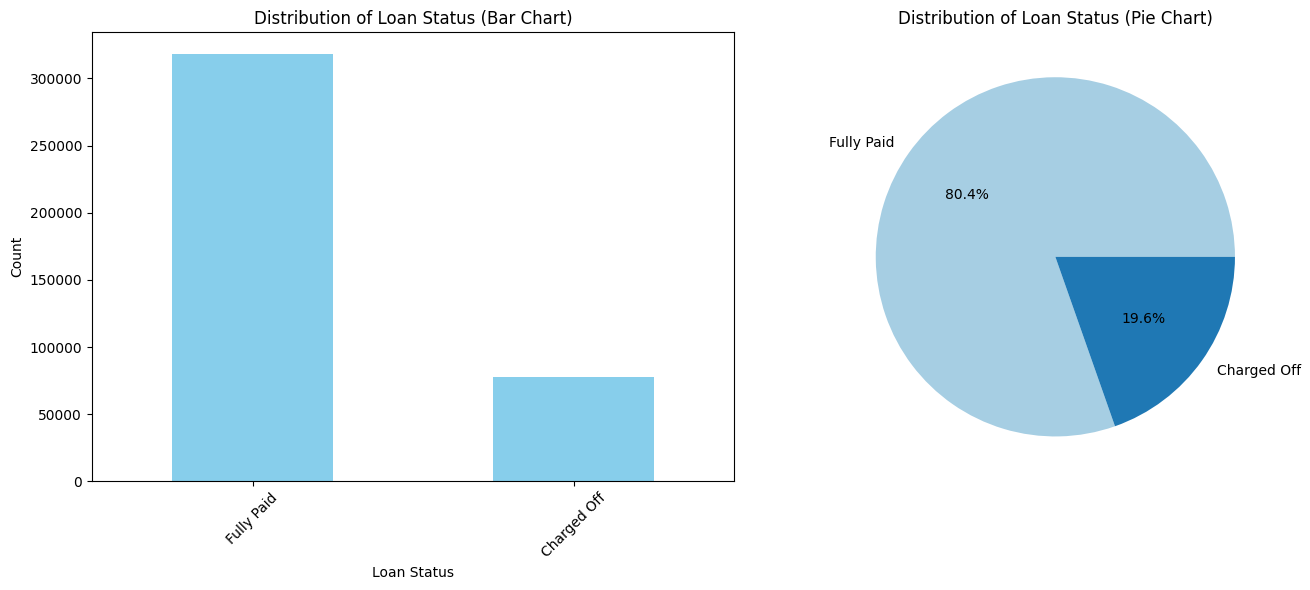

In [ ]:
# Count the number of each loan status category
loan_status_counts = df['loan_status'].value_counts()

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
loan_status_counts.plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Distribution of Loan Status (Bar Chart)')
axs[0].set_xlabel('Loan Status')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Pie chart
axs[1].pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[1].set_title('Distribution of Loan Status (Pie Chart)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


General Information about Customers Using the Service

In [ ]:
#categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.head()



,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Fully Paid,vacation,Vacation,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Charged Off,credit_card,Credit Card Refinance,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


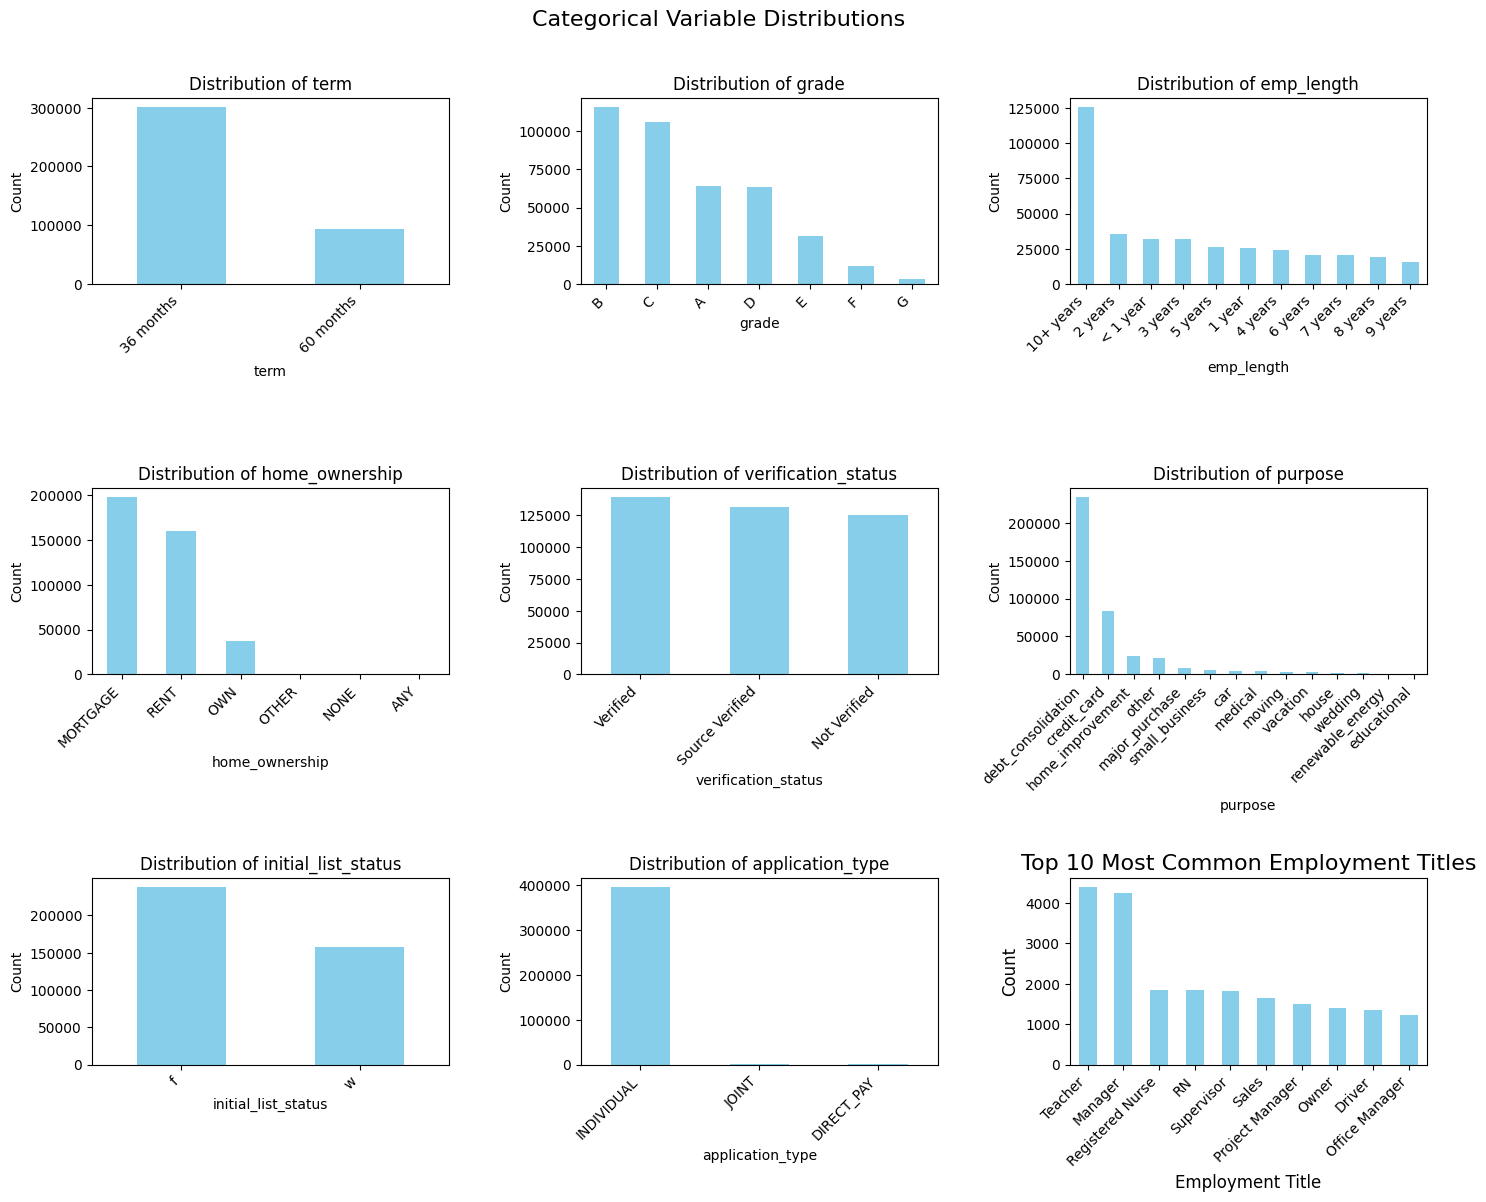

In [ ]:
import matplotlib.pyplot as plt

# List of categorical columns to plot
cat_columns = ['term', 'grade', 'emp_length',
               'home_ownership', 'verification_status',
               'purpose', 'initial_list_status', 'application_type']

n_cols = 3
n_rows = -(-len(cat_columns) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

# Create the plot for the top 10 most common employment titles
top_emp_titles = df['emp_title'].value_counts().head(10)

plt.subplot(n_rows, n_cols, len(cat_columns) + 1)
top_emp_titles.plot(kind='bar', color='skyblue')

plt.title('Top 10 Most Common Employment Titles', fontsize=16)
plt.xlabel('Employment Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout(pad=3.0)

# Add a main title for all the plots
plt.suptitle("Categorical Variable Distributions", fontsize=16, y=1.02)

# Display the final plot
plt.show()


The analysis of categorical variables reveals key characteristics of Lending Club's customer base. Most borrowers prefer shorter loan terms, especially 36 months, indicating a focus on rapid debt repayment and cautious financial management. The majority have good to average credit histories (grades A, B, and C), though there are also borrowers with higher credit risk.

Additionally, Lending Club’s customers tend to have stable employment, with debt consolidation being the primary loan purpose. Other common purposes include credit card repayment and home improvement. The majority of loans are individual, and borrowers come from diverse professions, including education, healthcare, and management, reflecting the platform's broad customer appeal.

## Numerical Feautre

In [ ]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

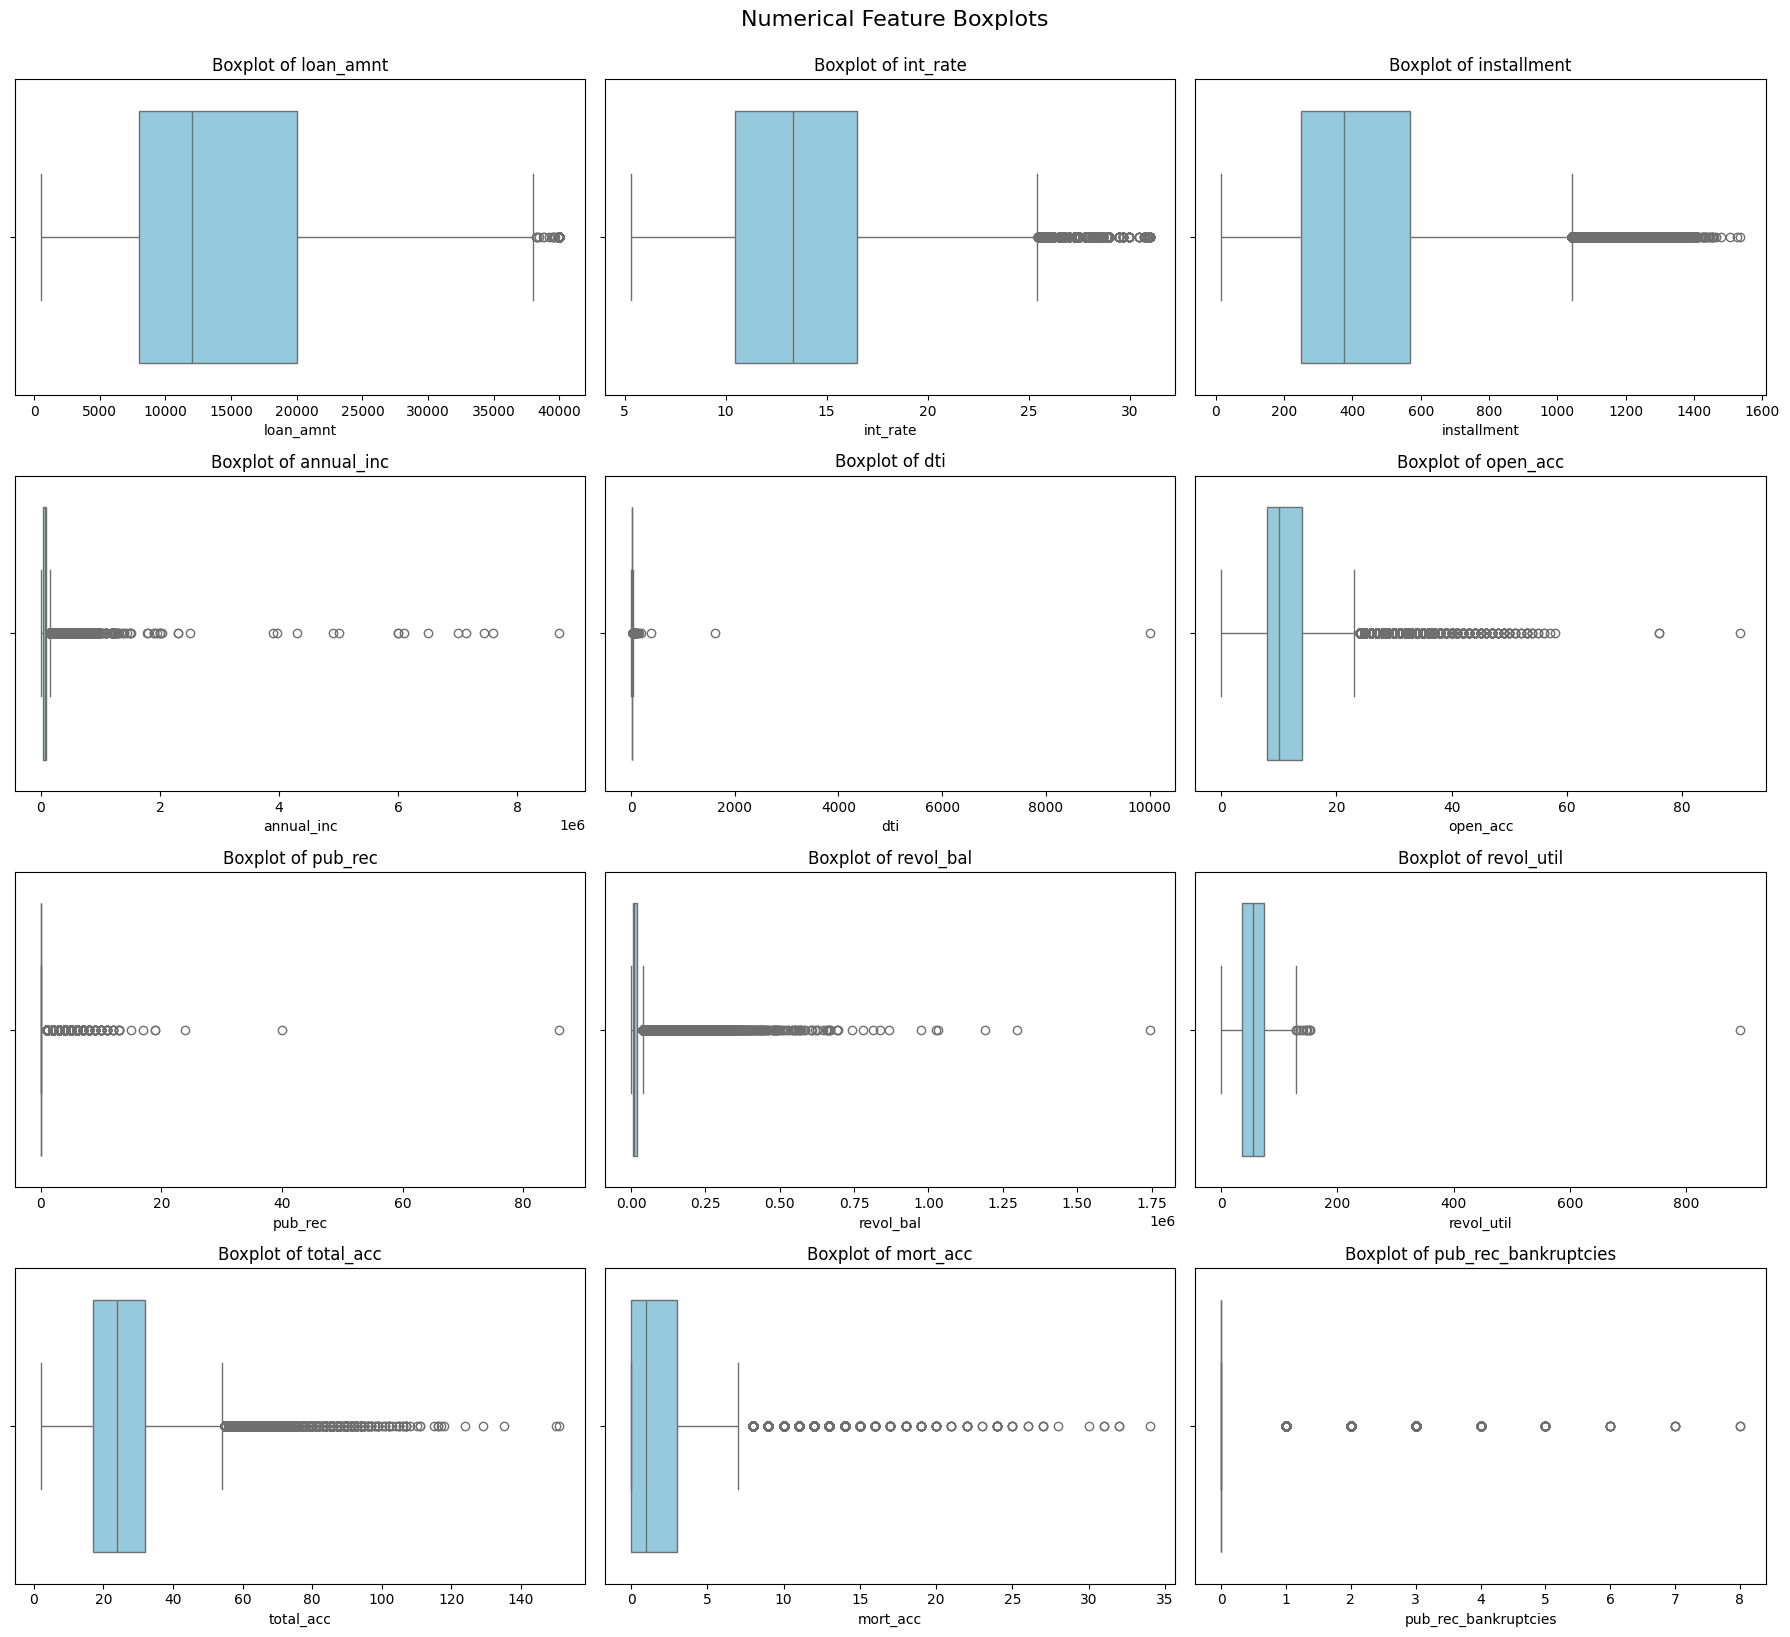

In [ ]:
num_columns =['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies']

# Grid layout
n_cols = 3
n_rows = -(-len(num_columns) // n_cols)  # làm tròn lên
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Vẽ boxplot cho từng cột
for i, col in enumerate(num_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Numerical Feature Boxplots", fontsize=16, y=1.02)
plt.show()


These findings suggest Lending Club serves a financially stable and diverse customer base, with a focus on short-term loans and financial restructuring.
The loan amounts borrowed by customers generally range from \$5,000 to \$25,000, with repayment terms typically associated with interest rates between 7\% and 15\%. Most customers tend to use a moderate amount of available credit, neither excessively nor minimally. There is a noticeable discrepancy between the number of open accounts and the total number of credit accounts, suggesting that many customers have closed accounts from previous credit relationships. The number of mortgage accounts is relatively low, reflecting that homeownership with a mortgage is not universal among borrowers.
The number of public filings for dissatisfaction and bankruptcy is generally low, indicating that the majority of customers have relatively good credit histories.


## The Correlation Matrix

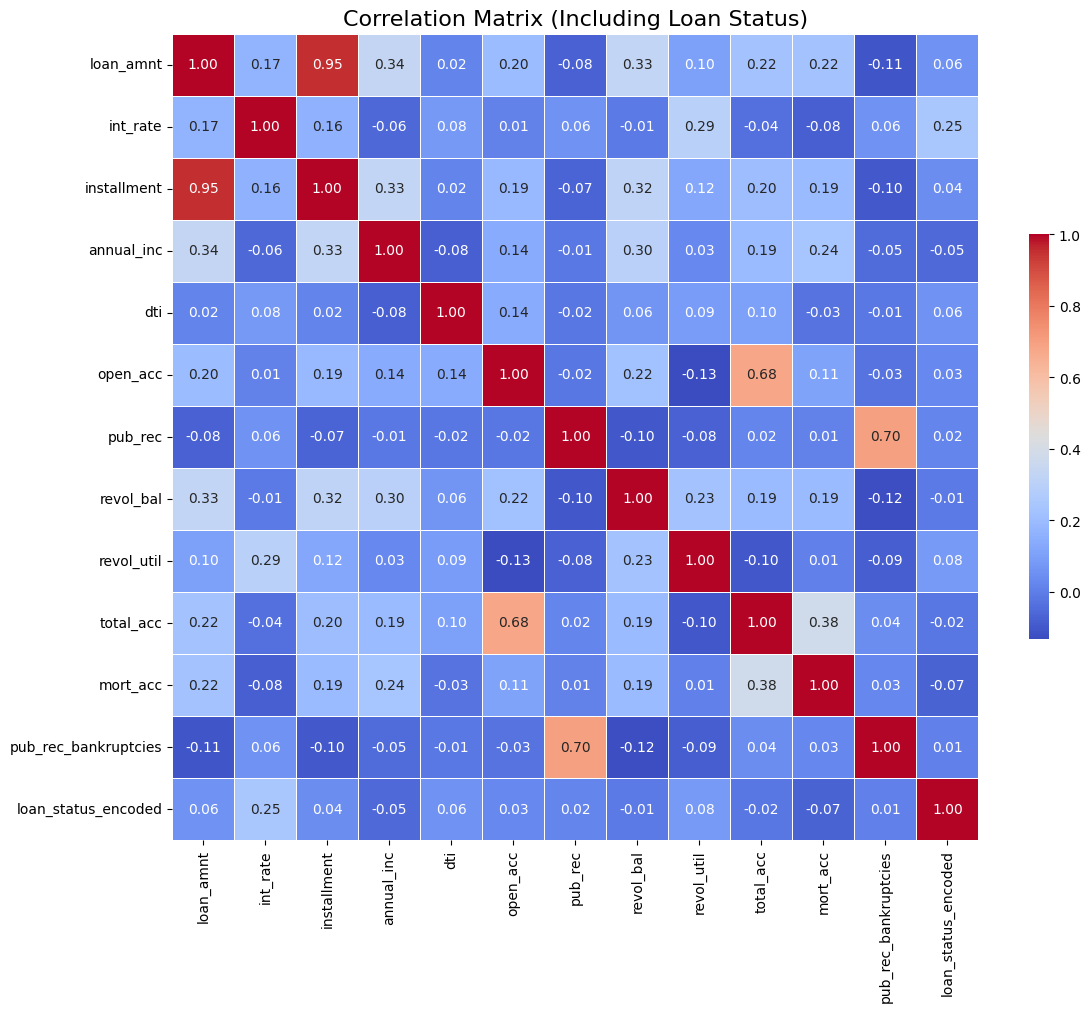

In [ ]:
df_encoded = df.copy()

df_encoded['loan_status_encoded'] = df_encoded['loan_status'].map({
    'Fully Paid': 0,
    'Charged Off': 1
})


num_df = df_encoded.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_df.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix (Including Loan Status)", fontsize=16)
plt.tight_layout()
plt.show()


# Data Preprocessing


In [ ]:
## Because existing many type of text: Manage, manage => same text
# Convert all categorical columns to lowercase
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply lowercase transformation
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower())



## Handling Missing Value

In [ ]:
# Check missing value
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Total Missing': missing_values, 'Percent': missing_percent})
missing_data.head(10)

,Total Missing,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1756,0.443401
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692
installment,0,0.000000
int_rate,0,0.000000
term,0,0.000000
grade,0,0.000000


mort_acc columns: fillnan = means

In [ ]:
mean_mort_acc = df['mort_acc'].mean()
df['mort_acc'] = df['mort_acc'].fillna(mean_mort_acc)


emp_title have 154014 unique values / 396030 original values and have 126749 jobs that appear one times => so much outlier


=> Drop the emp_title

In [ ]:
df['emp_title'].nunique()

154014

In [ ]:
value_counts = df['emp_title'].value_counts()

values_with_one_occurrence = value_counts[value_counts == 1]

num_values_with_one_occurrence = len(values_with_one_occurrence)

print(f"Number of values in emp_title that appear 1 time: {num_values_with_one_occurrence}")

Number of values in emp_title that appear 1 time: 126749


In [ ]:
df.drop('emp_title', axis=1, inplace=True)


emp_length: The paid full and charged off ratios between groups are equal, so there is no predictive significance.
=> Drop this column

<Figure size 1000x600 with 0 Axes>

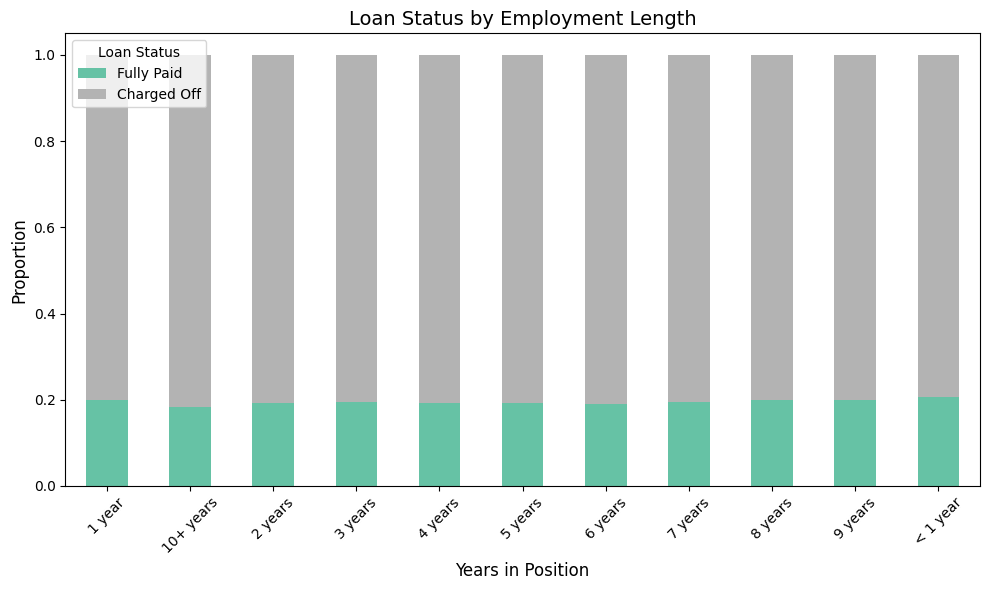

In [ ]:
loan_status_by_emp_length = df.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(10, 6))
loan_status_by_emp_length.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,6))

plt.title('Loan Status by Employment Length', fontsize=14)
plt.xlabel('Years in Position', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper left', labels=['Fully Paid', 'Charged Off'])

plt.tight_layout()
plt.show()


In [ ]:
df.drop('emp_length', axis=1, inplace=True)


title: The title column is simply a string subcategory/description of the purpose column.
=>So we are going to drop the title column.


In [ ]:
df['title'].value_counts().head(5)

,count
title,
debt consolidation,168108
credit card refinancing,51781
home improvement,17117
other,12993
consolidation,5583


In [ ]:
df['purpose'].value_counts().head(5)

,count
purpose,
debt_consolidation,234507
credit_card,83019
home_improvement,24030
other,21185
major_purchase,8790


In [ ]:
df.drop('title', axis=1, inplace=True)


'revol_util' and 'pub_rec_bankruptcies' have null only 0.07% và 0.135% => Drop nan

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(395219, 24)

## Handling Outlier

In [ ]:
def detect_outliers_iqr(df):
    # Lọc chỉ các cột s

    outliers = pd.DataFrame(False, index=df.index, columns=num_columns)  # Khởi tạo DataFrame chứa kết quả False (không phải outlier)

    # Kiểm tra từng cột
    for col in num_columns:
        Q1 = df[col].quantile(0.25)  # Tính Q1 (25th percentile)
        Q3 = df[col].quantile(0.75)  # Tính Q3 (75th percentile)
        IQR = Q3 - Q1  # Tính IQR (Interquartile Range)

        # Phát hiện outliers dựa trên điều kiện: < Q1 - 1.5 * IQR hoặc > Q3 + 1.5 * IQR
        outliers[col] = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

    return outliers

# Gọi hàm với DataFrame df
outliers_iqr = detect_outliers_iqr(df)
outliers_iqr.sum()  # Kiểm tra số lượng outliers trong từng cột


,0
loan_amnt,190
int_rate,3144
installment,11114
annual_inc,16649
dti,275
open_acc,10297
pub_rec,57730
revol_bal,21205
revol_util,12
total_acc,8491


In [ ]:
## Drop outliers
def remove_outliers_iqr(df, columns):
    # Tạo bản sao của dữ liệu để tránh thay đổi gốc
    df_out = df.copy()

    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Loại bỏ các giá trị ngoài phạm vi [lower_bound, upper_bound]
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]

    return df_out
df = remove_outliers_iqr(df, num_columns)

## Feature Engineering

In [ ]:
# Create a new feature: number of years since the first credit account was opened
df['years_since_earliest_cr'] = df['issue_d'].dt.year - df['earliest_cr_line'].dt.year

# Year, month, quarter
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df['issue_quarter'] = df['issue_d'].dt.quarter

# Season (Spring, Summer, Fall, Winter)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['issue_season'] = df['issue_month'].apply(get_season)

# Encode the season if using ML models
df['issue_season'] = df['issue_season'].astype('category').cat.codes

# Year of the first credit account opened
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_month'] = df['earliest_cr_line'].dt.month

# Drop the 'issue_d' and 'earliest_cr_line' columns as they are no longer needed
df = df.drop(['issue_d', 'earliest_cr_line'], axis=1)


In [ ]:
# Loan to income ratio
df['loan_to_income'] = df['loan_amnt'] / df['annual_inc']

# Monthly installment to annual income ratio
df['installment_to_income'] = df['installment'] / df['annual_inc']

# Number of loans per open credit account
df['loan_per_open_acc'] = df['loan_amnt'] / (df['open_acc'] + 1)  # +1 to avoid division by 0

# Average balance per account
df['avg_bal_per_acc'] = df['revol_bal'] / (df['open_acc'] + 1)

# Difference between current accounts and total number of accounts ever opened
df['unused_accounts'] = df['total_acc'] - df['open_acc']

# Interaction between loan amount and annual income
df['loan_income_interaction'] = df['loan_amnt'] * df['annual_inc']

# Squared DTI ratio
df['dti_squared'] = df['dti'] ** 2


## Encoding + Feature Selection

In [ ]:
# Drop grade and already keep sub_grade, because:
#sub_grade is more complete and detailed
#It helps avoid redundant information and multicollinearity
df.drop('grade', axis=1, inplace=True)

In [ ]:
#"The loan_status column has only two unique values: 'Fully Paid' and 'Charged Off'.
#Therefore, using the .map() method is suitable because of easily understanding for binary classification tasks and It doesn't add extra columns (unlike One-Hot Encoding).
df['loan_status'] = df['loan_status'].map({'fully paid': 0, 'charged off': 1})


In [ ]:
df_label =df.copy()

### Label-Encoder

#### Label encoder categorical

In [ ]:
# Extract the zip code from the address column
df_label['zip_code'] = df_label.address.apply(lambda x: x[-5:])
df_label['zip_code']= df_label['zip_code'].astype(int)
# Drop the address column as it's no longer needed
df_label.drop('address', axis=1, inplace=True)


In [ ]:
# Because term columns only have 2 value related to time -> drop months
term_values = {' 36 months': 36, ' 60 months': 60}
df_label['term'] = df_label.term.map(term_values)

In [ ]:
print([column for column in df_label.columns if df_label[column].dtype == object])


['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col])
    label_encoders[col] = le


#### Feature Selection using Random Forest to extract important variables

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,218026
1,53173


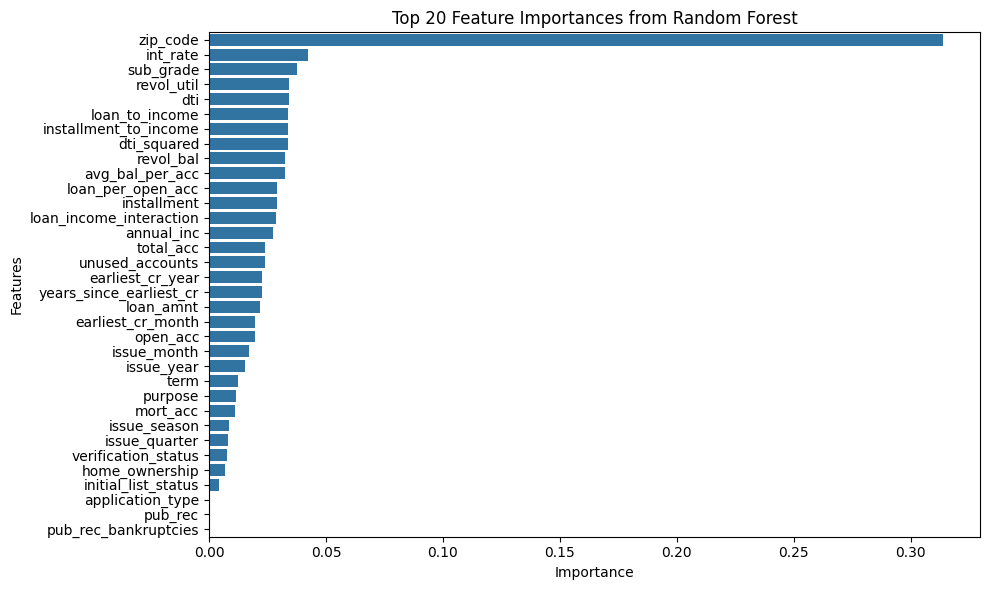

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chia X và y
X = df_label.drop('loan_status', axis=1)  # hoặc tên target thực tế
y = df_label['loan_status']

# Train mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Lấy importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# In ra top 20 biến quan trọng
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Top 20 Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
#### Select features that have important >0.01
selected_features = feature_importance[feature_importance > 0.01].index.tolist()
selected_features

['zip_code',
 'int_rate',
 'sub_grade',
 'revol_util',
 'dti',
 'loan_to_income',
 'installment_to_income',
 'dti_squared',
 'revol_bal',
 'avg_bal_per_acc',
 'loan_per_open_acc',
 'installment',
 'loan_income_interaction',
 'annual_inc',
 'total_acc',
 'unused_accounts',
 'earliest_cr_year',
 'years_since_earliest_cr',
 'loan_amnt',
 'earliest_cr_month',
 'open_acc',
 'issue_month',
 'issue_year',
 'term',
 'purpose',
 'mort_acc']

In [ ]:
df_label = df_label[selected_features + ['loan_status']]

In [ ]:
df_label.shape

(271199, 27)

### One-hot-Encoder

#### One-hot Encoder for categorical columns

In [ ]:
df_one_hot = df.copy()

In [ ]:
# Extract the zip code from the address column
df_one_hot['zip_code'] = df_one_hot.address.apply(lambda x: x[-5:])
df_one_hot['zip_code']= df_one_hot['zip_code'].astype(int)
# Drop the address column as it's no longer needed
df_one_hot.drop('address', axis=1, inplace=True)


In [ ]:
# Because term columns only have 2 value related to time -> drop months
term_values = {' 36 months': 36, ' 60 months': 60}
df_one_hot['term'] = df_one_hot.term.map(term_values)

In [ ]:
df_one_hot.select_dtypes(include=['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type'],
      dtype='object')

In [ ]:
cols_to_encode = [
    'sub_grade',
    'home_ownership',
    'verification_status',
    'purpose',
    'initial_list_status',
    'application_type'
]

df_one_hot = pd.get_dummies(df_one_hot, columns=cols_to_encode, drop_first=True)


In [ ]:
df_one_hot.shape

(271199, 86)

#### Feature Selection by using Random Forest to extract important variable

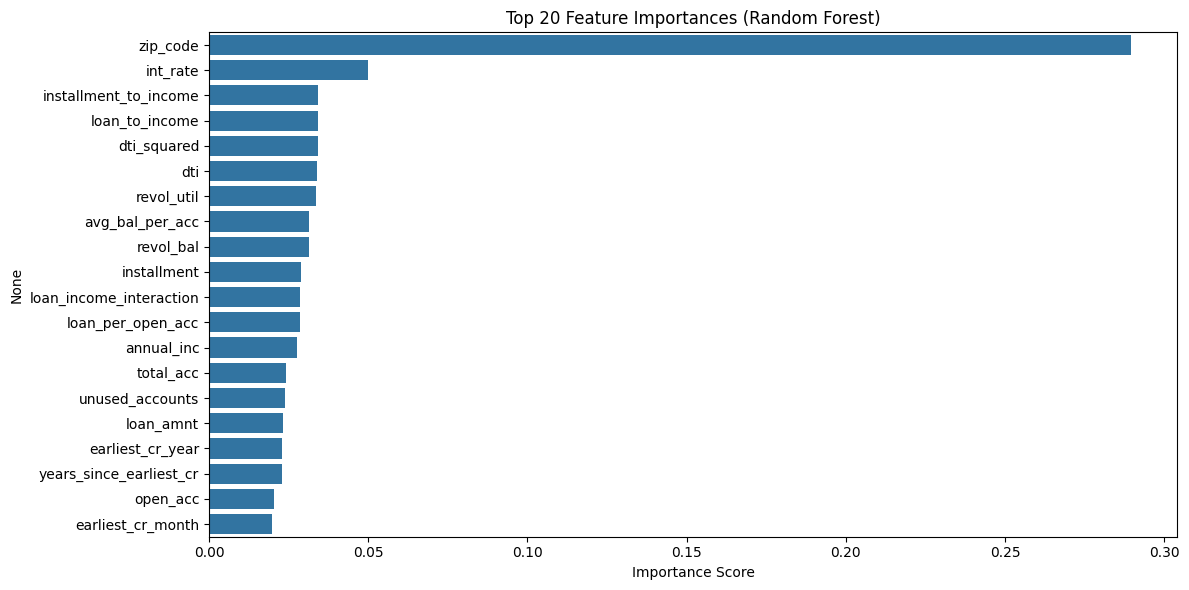

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tách X, y
X = df_one_hot.drop('loan_status', axis=1)  # hoặc cột target của bạn
y = df_one_hot['loan_status']

# 2. Train mô hình
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 3. Lấy feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# 4. Vẽ biểu đồ top 20 feature quan trọng nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=importances_sorted[:20], y=importances_sorted.index[:20])
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()



In [ ]:

#  Lọc các feature có importance > threshold
threshold = 0.01  # bạn có thể thay đổi ngưỡng này
selected_features = importances[importances > threshold].index.tolist()

In [ ]:
df_one_hot = df_one_hot[selected_features + ['loan_status']]
df_one_hot.shape

(271199, 25)

In [ ]:
df['address'].nunique()

270016

In [ ]:
df['address'].head(20)

,address
0,"0174 michelle gateway\r\nmendozaberg, ok 22690"
1,"1076 carney fort apt. 347\r\nloganmouth, sd 05113"
2,"87025 mark dale apt. 269\r\nnew sabrina, wv 05113"
3,"823 reid ford\r\ndelacruzside, ma 00813"
4,"679 luna roads\r\ngreggshire, va 11650"
5,1726 cooper passage suite 129\r\nnorth deniseb...
6,"1008 erika vista suite 748\r\neast stephanie, ..."
7,uscgc nunez\r\nfpo ae 30723
8,uscgc tran\r\nfpo ap 22690
9,"3390 luis rue\r\nmauricestad, va 00813"


### WOE

In [ ]:
df_woe = df.copy()

#### WOE for categorical features

In [ ]:
# Extract the zip code from the address column
df_woe['zip_code'] = df_woe.address.apply(lambda x: x[-5:])
# Drop the address column as it's no longer needed
df_woe.drop('address', axis=1, inplace=True)


In [ ]:
print([column for column in df_woe.columns if df_woe[column].dtype == object])

['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'zip_code']


In [ ]:
def calculate_woe_iv(df, feature, target):
    eps = 1e-6
    lst = []
    for val in df[feature].dropna().unique():
        total = len(df[df[feature] == val])
        good = len(df[(df[feature] == val) & (df[target] == 0)])
        bad = len(df[(df[feature] == val) & (df[target] == 1)])
        lst.append({'Value': val, 'Total': total, 'Good': good, 'Bad': bad})

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / (dset['Good'].sum() + eps)
    dset['Distr_Bad'] = dset['Bad'] / (dset['Bad'].sum() + eps)
    dset['WOE'] = np.log((dset['Distr_Good'] + eps) / (dset['Distr_Bad'] + eps))
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WOE']
    iv = dset['IV'].sum()

    return dset[['Value', 'WOE', 'IV']], iv

# 2. Lọc các biến categorical (object hoặc category)
categorical_cols = df_woe.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. Tính WOE & IV cho từng biến và lưu kết quả
iv_summary = {}
woe_tables = {}

for col in categorical_cols:
    try:
        print(f"\n=== Feature: {col} ===")
        woe_table, iv = calculate_woe_iv(df_woe, col, 'loan_status')
        print(woe_table)
        print(f"🔹 IV for {col}: {iv:.4f}")
        iv_summary[col] = iv
        woe_tables[col] = woe_table
    except Exception as e:
        print(f"⚠️ Không tính được WOE/IV cho cột {col}: {e}")
# 4. Tổng hợp IV toàn bộ biến categorical
iv_df_cate = pd.DataFrame.from_dict(iv_summary, orient='index', columns=['IV']).sort_values(by='IV', ascending=False)

# 5. Gộp bảng WOE cho từng biến
woe_df_cate = pd.concat(
    [woe.assign(Variable=col) for col, woe in woe_tables.items()],
    ignore_index=True
)


=== Feature: term ===
        Value       WOE        IV
0   36 months  0.259519  0.048000
1   60 months -0.677624  0.125332
🔹 IV for term: 0.1733

=== Feature: sub_grade ===
   Value       WOE        IV
0     b4  0.408012  0.009700
1     b5  0.244915  0.003150
2     b3  0.526575  0.016447
3     a2  1.551229  0.038721
4     c5 -0.323259  0.005100
5     c3 -0.189250  0.001967
6     a1  2.094987  0.058969
7     b2  0.657773  0.020351
8     a5  0.940909  0.031545
9     e4 -1.024277  0.017730
10    a3  1.340342  0.033204
11    d1 -0.433401  0.008362
12    c2 -0.056200  0.000182
13    b1  0.781679  0.023486
14    d3 -0.521970  0.009517
15    c1  0.128363  0.000954
16    d5 -0.699991  0.013944
17    d2 -0.506003  0.010343
18    e1 -0.832857  0.016546
19    e2 -0.879872  0.017449
20    e5 -1.039226  0.015625
21    a4  1.159394  0.039552
22    f4 -1.350910  0.010374
23    e3 -0.974214  0.018158
24    c4 -0.286732  0.004490
25    f5 -1.402114  0.006999
26    f1 -1.038403  0.011821
27    f3 -1.2

In [ ]:
woe_df_cate

,Value,WOE,IV,Variable
0,36 months,0.259519,4.799993e-02,term
1,60 months,-0.677624,1.253315e-01,term
2,b4,0.408012,9.700015e-03,sub_grade
3,b5,0.244915,3.149626e-03,sub_grade
4,b3,0.526575,1.644663e-02,sub_grade
...,...,...,...,...
70,70466,-0.000456,2.989522e-08,zip_code
71,48052,-0.021811,6.795677e-05,zip_code
72,86630,-11.871036,1.698286e+00,zip_code
73,29597,11.869653,1.695743e+00,zip_code


In [ ]:
#Replace each category level with its corresponding WOE value.
# Encode toàn bộ các biến categorical bằng WOE
for col in categorical_cols:
    if col in woe_tables:
        # Lấy bảng WOE đã tính cho biến này
        woe_map = woe_tables[col].set_index('Value')['WOE'].to_dict()
        # Thay thế giá trị bằng WOE
        df_woe[col] = df_woe[col].map(woe_map)


In [ ]:
df_woe.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,earliest_cr_year,earliest_cr_month,loan_to_income,installment_to_income,loan_per_open_acc,avg_bal_per_acc,unused_accounts,loan_income_interaction,dti_squared,zip_code
0,10000.0,0.259519,11.44,329.48,0.408012,-0.144701,117000.0,0.361609,0,0.048911,...,1990,6,0.085470,0.002816,588.235294,2139.352941,9.0,1.170000e+09,688.5376,0.022530
1,8000.0,0.259519,11.99,265.68,0.244915,0.170096,65000.0,0.361609,0,-0.065716,...,2004,7,0.123077,0.004087,444.444444,1118.388889,10.0,5.200000e+08,486.2025,11.865052
2,15600.0,0.259519,10.49,506.97,0.526575,-0.144701,43057.0,-0.157477,0,0.179808,...,2007,8,0.362310,0.011774,1114.285714,856.214286,13.0,6.716892e+08,163.5841,11.865052
3,7200.0,0.259519,6.49,220.65,1.551229,-0.144701,54000.0,0.361609,0,0.179808,...,2006,9,0.133333,0.004086,1028.571429,781.714286,7.0,3.888000e+08,6.7600,11.874425
4,24375.0,-0.677624,17.27,609.33,-0.323259,0.170096,55000.0,-0.184271,1,0.179808,...,1999,3,0.443182,0.011079,1741.071429,1756.000000,30.0,1.340625e+09,1152.6025,-11.879674


#### WOE for numerical features

In [ ]:
import pandas as pd
import numpy as np
# Using bins = 20
def calculate_woe_iv_numerical(df, target, bins=20, show_woe=False):
    iv_df = pd.DataFrame(columns=['Variable', 'IV'])
    woe_df_num = pd.DataFrame()

    numeric_cols = df[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'years_since_earliest_cr',
       'issue_year', 'issue_month', 'issue_quarter', 'issue_season',
       'earliest_cr_year', 'earliest_cr_month', 'loan_to_income',
       'installment_to_income', 'loan_per_open_acc', 'avg_bal_per_acc',
       'unused_accounts', 'loan_income_interaction', 'dti_squared']].columns

    for col in numeric_cols:
        try:
            # Binning theo quantile
            binned = pd.qcut(df[col], bins, duplicates='drop')
            d0 = pd.DataFrame({'Bin': binned, 'Target': df[target]})

            grouped = d0.groupby('Bin', as_index=False).agg({'Target': ['count', 'sum']})
            grouped.columns = ['Bin', 'Total', 'Events']
            grouped['Non-Events'] = grouped['Total'] - grouped['Events']
            grouped['% Events'] = np.maximum(grouped['Events'], 0.5) / grouped['Events'].sum()
            grouped['% Non-Events'] = np.maximum(grouped['Non-Events'], 0.5) / grouped['Non-Events'].sum()
            grouped['WOE'] = np.log(grouped['% Events'] / grouped['% Non-Events'])
            grouped['IV'] = (grouped['% Events'] - grouped['% Non-Events']) * grouped['WOE']
            grouped.insert(0, 'Variable', col)

            iv_value = grouped['IV'].sum()
            iv_df = pd.concat([iv_df, pd.DataFrame([[col, iv_value]], columns=['Variable', 'IV'])], ignore_index=True)
            woe_df_num = pd.concat([woe_df_num, grouped], ignore_index=True)

            if show_woe:
                print(f"\n🔹 WOE Table for: {col}")
                print(grouped)

        except Exception as e:
            print(f"⚠️ Error {col}: {e}")

    iv_df_num = iv_df.sort_values(by='IV', ascending=False).reset_index(drop=True)
    return iv_df_num, woe_df_num


In [ ]:
iv_df_num, woe_df_num = calculate_woe_iv_numerical(df_woe, target='loan_status', bins=20, show_woe=False)


<ipython-input-166-ede15255cb56>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = d0.groupby('Bin', as_index=False).agg({'Target': ['count', 'sum']})
<ipython-input-166-ede15255cb56>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iv_df = pd.concat([iv_df, pd.DataFrame([[col, iv_value]], columns=['Variable', 'IV'])], ignore_index=True)
<ipython-input-166-ede15255cb56>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

In [ ]:
woe_df_num

,Variable,Bin,Total,Events,Non-Events,% Events,% Non-Events,WOE,IV
0,loan_amnt,"(724.999, 3000.0]",14115,2154,11961,0.040509,0.054860,-0.303261,0.004352
1,loan_amnt,"(3000.0, 4750.0]",13036,2209,10827,0.041544,0.049659,-0.178440,0.001448
2,loan_amnt,"(4750.0, 5500.0]",14485,2545,11940,0.047863,0.054764,-0.134700,0.000930
3,loan_amnt,"(5500.0, 6200.0]",12731,1936,10795,0.036409,0.049512,-0.307396,0.004028
4,loan_amnt,"(6200.0, 7200.0]",13517,2236,11281,0.042051,0.051742,-0.207368,0.002009
...,...,...,...,...,...,...,...,...,...
393,zip_code,"(-0.000456, 0.00654]",38690,7546,31144,0.141914,0.142845,-0.006540,0.000006
394,zip_code,"(0.00654, 0.0225]",38683,7448,31235,0.140071,0.143263,-0.022530,0.000072
395,zip_code,"(0.0225, 11.865]",31005,0,31005,0.000009,0.142208,-9.623987,1.368516
396,zip_code,"(11.865, 11.87]",31148,0,31148,0.000009,0.142864,-9.628589,1.375485


#### Feature Selection by IV

In [ ]:
iv_df_num

,Variable,IV
0,int_rate,0.442838
1,loan_to_income,0.140841
2,installment_to_income,0.107452
3,dti_squared,0.102805
4,dti,0.102805
5,issue_year,0.088374
6,revol_util,0.055225
7,annual_inc,0.048913
8,mort_acc,0.035508
9,loan_amnt,0.034948


In [ ]:
iv_df_cate

,Variable,IV
0,term,0.173331
1,sub_grade,0.485161
2,home_ownership,0.022627
3,verification_status,0.061633
4,purpose,0.020205
5,initial_list_status,0.001129
6,application_type,0.000177
7,zip_code,10.187438


In [ ]:
iv_df_cate = pd.DataFrame(list(iv_summary.items()), columns=['Variable', 'IV'])
iv_combined = pd.concat([iv_df_num, iv_df_cate], ignore_index=True)
iv_combined = iv_combined.sort_values(by="IV", ascending=False).reset_index(drop=True)
iv_combined


,Variable,IV
0,zip_code,10.187438
1,sub_grade,0.485161
2,int_rate,0.442838
3,term,0.173331
4,loan_to_income,0.140841
5,installment_to_income,0.107452
6,dti,0.102805
7,dti_squared,0.102805
8,issue_year,0.088374
9,verification_status,0.061633


Thresh Hold Decision Threshold
IV Range Predictive Power
+ IV < 0.02 Useless
+ 0.02 ≤ IV < 0.1 Weak predictor
+ 0.1 ≤ IV < 0.3 Medium predictor
+ 0.3 ≤ IV < 0.5 Strong predictor
+ IV ≥ 0.5 Very strong

=> Drop all columns have IV < 0.02

In [ ]:
#Drop all columns have IV < 0.02
iv_threshold = 0.02
selected_features = iv_combined[iv_combined['IV'] >= iv_threshold]['Variable'].tolist()

# Lọc lại DataFrame chỉ giữ các feature quan trọng
df_woe= df_woe[selected_features + ['loan_status']]


In [ ]:
df_woe.shape

(271199, 18)

# Modeling

## Prepare Modeling


### Label Encoder

In [ ]:
X_label = df_label.drop('loan_status',axis=1)  # Loại bỏ cột mục tiêu để tạo các đặc trưng (features)
y_label = df_label['loan_status']  # Chọn cột loan_status làm mục tiêu (labels)
print(X_label.shape)
print(y_label.shape)

(271199, 26)
(271199,)


In [ ]:
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Bước 1: Áp dụng SMOTE trên tập huấn luyện đã loại bỏ outliers
smote = SMOTE(random_state=42)
X_train_label, y_train_label = smote.fit_resample(X_train_label, y_train_label)

# Bước 2: Scale dữ liệu sau khi áp dụng SMOTE
scaler = StandardScaler()
X_train_label = scaler.fit_transform(X_train_label)  # Áp dụng scaler trên dữ liệu huấn luyện đã cân bằng
X_test_label = scaler.transform(X_test_label)  # Áp dụng cùng scaler đã fit trên tập huấn luyện để chuẩn hóa dữ liệu test


### One-Hot-Encoder

In [ ]:
X_one_hot = df_one_hot.drop('loan_status',axis=1)  # Loại bỏ cột mục tiêu để tạo các đặc trưng (features)
y_one_hot = df_one_hot['loan_status']  # Chọn cột loan_status làm mục tiêu (labels)
print(X_one_hot.shape)
print(y_one_hot.shape)

(271199, 24)
(271199,)


In [ ]:
X_train_one_hot, X_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(X_one_hot, y_one_hot, test_size=0.2, random_state=42)

# Bước 1: Áp dụng SMOTE trên tập huấn luyện đã loại bỏ outliers
smote = SMOTE(random_state=42)
X_train_one_hot, y_train_one_hot = smote.fit_resample(X_train_one_hot, y_train_one_hot)

# Bước 2: Scale dữ liệu sau khi áp dụng SMOTE
scaler = StandardScaler()
X_train_one_hot = scaler.fit_transform(X_train_one_hot)  # Áp dụng scaler trên dữ liệu huấn luyện đã cân bằng
X_test_one_hot = scaler.transform(X_test_one_hot)  # Áp dụng cùng scaler đã fit trên tập huấn luyện để chuẩn hóa dữ liệu test


### WOE

In [ ]:
X_woe = df_woe.drop('loan_status',axis=1)  # Loại bỏ cột mục tiêu để tạo các đặc trưng (features)
y_woe = df_woe['loan_status']  # Chọn cột loan_status làm mục tiêu (labels)
print(X_woe.shape)
print(y_woe.shape)

(271199, 17)
(271199,)


In [ ]:
X_woe.head()

,zip_code,sub_grade,int_rate,term,loan_to_income,installment_to_income,dti,dti_squared,issue_year,verification_status,revol_util,annual_inc,mort_acc,loan_amnt,installment,home_ownership,purpose
0,0.022530,0.408012,11.44,0.259519,0.085470,0.002816,26.24,688.5376,2015,0.361609,41.8,117000.0,0.0,10000.0,329.48,-0.144701,0.048911
1,11.865052,0.244915,11.99,0.259519,0.123077,0.004087,22.05,486.2025,2015,0.361609,53.3,65000.0,3.0,8000.0,265.68,0.170096,-0.065716
2,11.865052,0.526575,10.49,0.259519,0.362310,0.011774,12.79,163.5841,2015,-0.157477,92.2,43057.0,0.0,15600.0,506.97,-0.144701,0.179808
3,11.874425,1.551229,6.49,0.259519,0.133333,0.004086,2.60,6.7600,2014,0.361609,21.5,54000.0,0.0,7200.0,220.65,-0.144701,0.179808
4,-11.879674,-0.323259,17.27,-0.677624,0.443182,0.011079,33.95,1152.6025,2013,-0.184271,69.8,55000.0,1.0,24375.0,609.33,0.170096,0.179808


In [ ]:
X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.2, random_state=42)

# Bước 1: Áp dụng SMOTE trên tập huấn luyện đã loại bỏ outliers
smote = SMOTE(random_state=42)
X_train_woe, y_train_woe = smote.fit_resample(X_train_woe, y_train_woe)

# Bước 2: Scale dữ liệu sau khi áp dụng SMOTE
scaler = StandardScaler()
X_train_woe = scaler.fit_transform(X_train_woe)  # Áp dụng scaler trên dữ liệu huấn luyện đã cân bằng
X_test_woe = scaler.transform(X_test_woe)  # Áp dụng cùng scaler đã fit trên tập huấn luyện để chuẩn hóa dữ liệu test


## Training Model

#### Logistic regression model

=== Label Encoding ===
Accuracy: 0.7932
AUC: 0.7793
Gini Index: 0.5586
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     43582
           1       0.48      0.52      0.50     10658

    accuracy                           0.79     54240
   macro avg       0.68      0.69      0.68     54240
weighted avg       0.80      0.79      0.80     54240

--------------------------------------------------


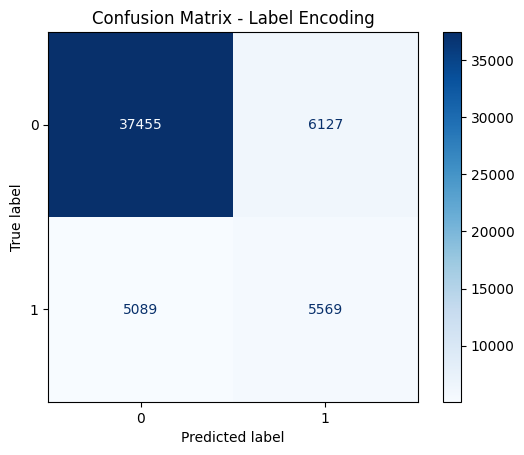

=== One-Hot Encoding ===
Accuracy: 0.7932
AUC: 0.7784
Gini Index: 0.5569
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     43582
           1       0.48      0.52      0.50     10658

    accuracy                           0.79     54240
   macro avg       0.68      0.69      0.68     54240
weighted avg       0.80      0.79      0.80     54240

--------------------------------------------------


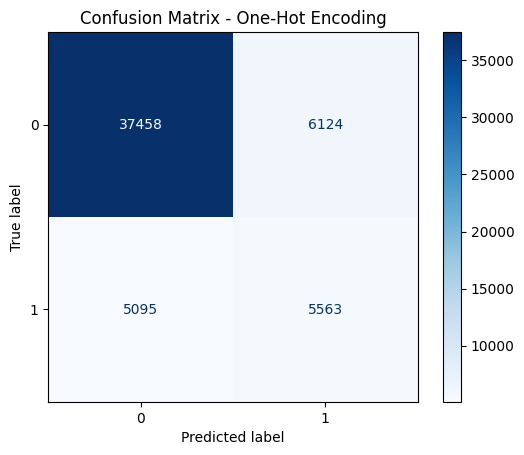

=== WOE Encoding ===
Accuracy: 0.8419
AUC: 0.9046
Gini Index: 0.8092
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     43582
           1       0.58      0.71      0.64     10658

    accuracy                           0.84     54240
   macro avg       0.75      0.79      0.77     54240
weighted avg       0.86      0.84      0.85     54240

--------------------------------------------------


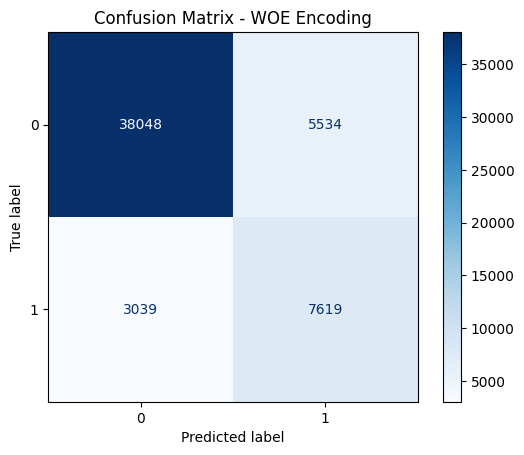

=== Tổng hợp so sánh ===
            Encoder  Accuracy       AUC      Gini
0    Label Encoding  0.793215  0.779298  0.558596
1  One-Hot Encoding  0.793160  0.778433  0.556865
2      WOE Encoding  0.841943  0.904618  0.809237


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def evaluate_model(model, X_test, y_test, encoder_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    gini = 2 * auc - 1
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"=== {encoder_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Gini Index: {gini:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # 📊 Vẽ confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {encoder_name}")
    plt.grid(False)
    plt.show()

    return {
        "Encoder": encoder_name,
        "Accuracy": acc,
        "AUC": auc,
        "Gini": gini
    }
results = []

# Label Encoding
model_label = LogisticRegression(max_iter=1000, solver='lbfgs')
model_label.fit(X_train_label, y_train_label)
results.append(evaluate_model(model_label, X_test_label, y_test_label, "Label Encoding"))

# One-Hot Encoding
model_one_hot = LogisticRegression(max_iter=1000, solver='lbfgs')
model_one_hot.fit(X_train_one_hot, y_train_one_hot)
results.append(evaluate_model(model_one_hot, X_test_one_hot, y_test_one_hot, "One-Hot Encoding"))

# WOE Encoding
model_woe = LogisticRegression(max_iter=1000, solver='lbfgs')
model_woe.fit(X_train_woe, y_train_woe)
results.append(evaluate_model(model_woe, X_test_woe, y_test_woe, "WOE Encoding"))

# Tổng hợp kết quả
results_df = pd.DataFrame(results)
print("=== Tổng hợp so sánh ===")
print(results_df)


ROC Curve cho Label, One-Hot, và WOE Encoding


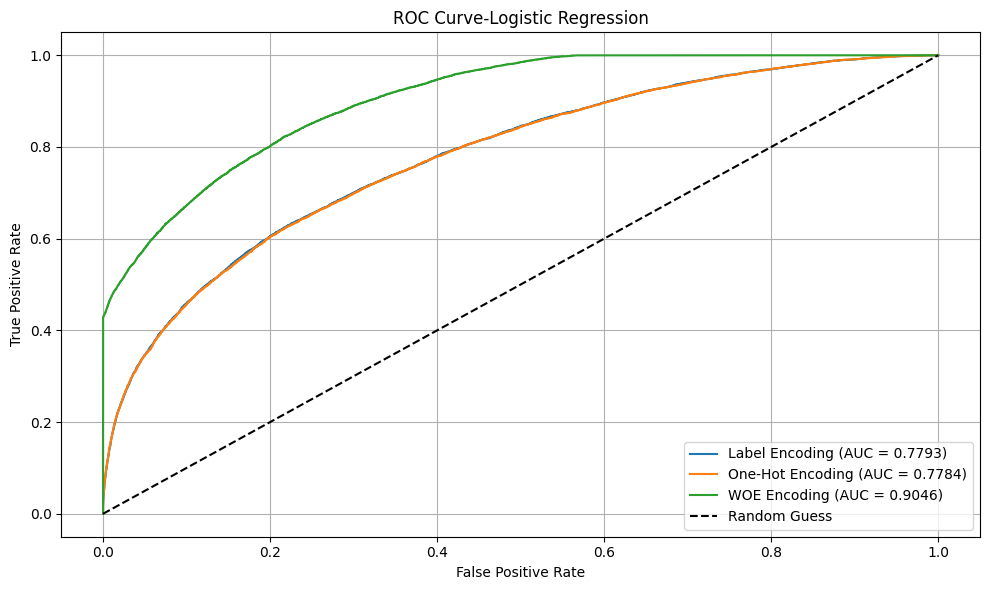

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Label Encoding
y_proba_label = model_label.predict_proba(X_test_label)[:, 1]
fpr_label, tpr_label, _ = roc_curve(y_test_label, y_proba_label)
auc_label = auc(fpr_label, tpr_label)
plt.plot(fpr_label, tpr_label, label=f"Label Encoding (AUC = {auc_label:.4f})")

# One-Hot Encoding
y_proba_one_hot = model_one_hot.predict_proba(X_test_one_hot)[:, 1]
fpr_one_hot, tpr_one_hot, _ = roc_curve(y_test_one_hot, y_proba_one_hot)
auc_one_hot = auc(fpr_one_hot, tpr_one_hot)
plt.plot(fpr_one_hot, tpr_one_hot, label=f"One-Hot Encoding (AUC = {auc_one_hot:.4f})")

# WOE Encoding
y_proba_woe = model_woe.predict_proba(X_test_woe)[:, 1]
fpr_woe, tpr_woe, _ = roc_curve(y_test_woe, y_proba_woe)
auc_woe = auc(fpr_woe, tpr_woe)
plt.plot(fpr_woe, tpr_woe, label=f"WOE Encoding (AUC = {auc_woe:.4f})")

# Tùy chỉnh biểu đồ
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Random Forest Model

=== Label Encoding (Random Forest) ===
Accuracy: 0.8823
AUC: 0.8894
Gini Index: 0.7788
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     43582
           1       0.80      0.53      0.64     10658

    accuracy                           0.88     54240
   macro avg       0.85      0.75      0.78     54240
weighted avg       0.88      0.88      0.87     54240

--------------------------------------------------


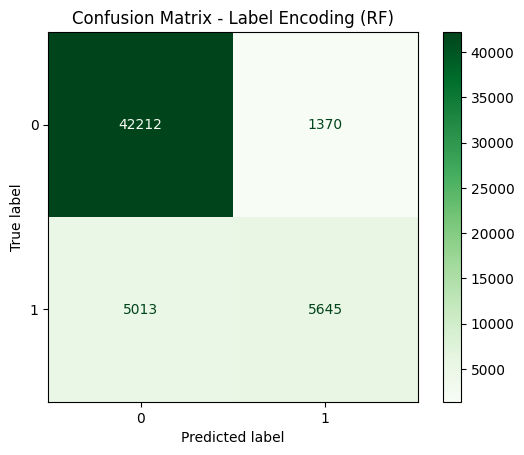

=== One-Hot Encoding (Random Forest) ===
Accuracy: 0.8807
AUC: 0.8861
Gini Index: 0.7722
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     43582
           1       0.79      0.53      0.64     10658

    accuracy                           0.88     54240
   macro avg       0.84      0.75      0.78     54240
weighted avg       0.87      0.88      0.87     54240

--------------------------------------------------


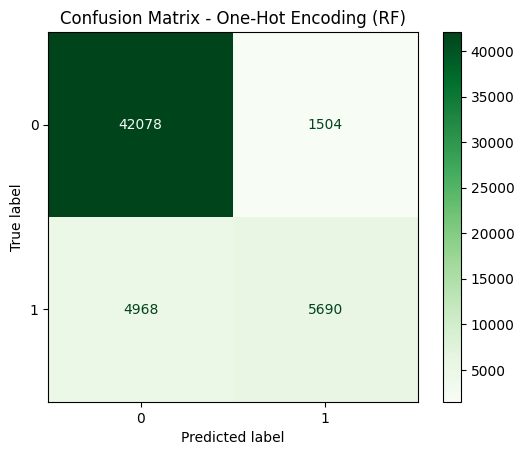

=== WOE Encoding (Random Forest) ===
Accuracy: 0.8872
AUC: 0.9020
Gini Index: 0.8041
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     43582
           1       0.87      0.50      0.64     10658

    accuracy                           0.89     54240
   macro avg       0.88      0.74      0.78     54240
weighted avg       0.89      0.89      0.87     54240

--------------------------------------------------


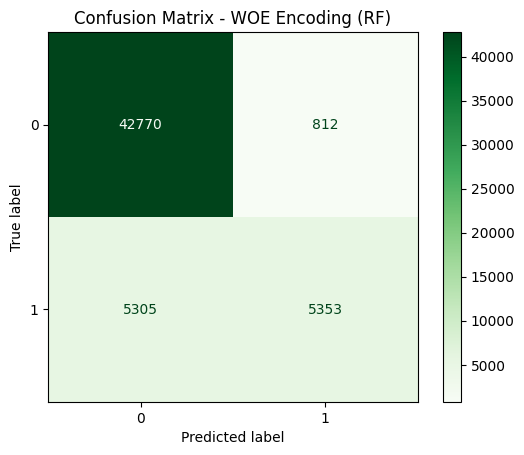

=== Tổng hợp so sánh Random Forest ===
            Encoder  Accuracy       AUC      Gini
0    Label Encoding  0.882319  0.889379  0.778759
1  One-Hot Encoding  0.880678  0.886081  0.772162
2      WOE Encoding  0.887223  0.902047  0.804093


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_model(model, X_test, y_test, encoder_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    gini = 2 * auc - 1
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"=== {encoder_name} (Random Forest) ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Gini Index: {gini:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # 📊 Vẽ confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Greens')
    plt.title(f"Confusion Matrix - {encoder_name} (RF)")
    plt.grid(False)
    plt.show()

    return {
        "Encoder": encoder_name,
        "Accuracy": acc,
        "AUC": auc,
        "Gini": gini
    }

# Train và evaluate Random Forest trên các encoding
results_rf = []

# 1. Label Encoding
rf_label = RandomForestClassifier(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)
results_rf.append(evaluate_model(rf_label, X_test_label, y_test_label, "Label Encoding"))

# 2. One-Hot Encoding
rf_onehot = RandomForestClassifier(n_estimators=100, random_state=42)
rf_onehot.fit(X_train_one_hot, y_train_one_hot)
results_rf.append(evaluate_model(rf_onehot, X_test_one_hot, y_test_one_hot, "One-Hot Encoding"))

# 3. WOE Encoding
rf_woe = RandomForestClassifier(n_estimators=100, random_state=42)
rf_woe.fit(X_train_woe, y_train_woe)
results_rf.append(evaluate_model(rf_woe, X_test_woe, y_test_woe, "WOE Encoding"))

# Tổng hợp kết quả RF
results_rf_df = pd.DataFrame(results_rf)
print("=== Tổng hợp so sánh Random Forest ===")
print(results_rf_df)


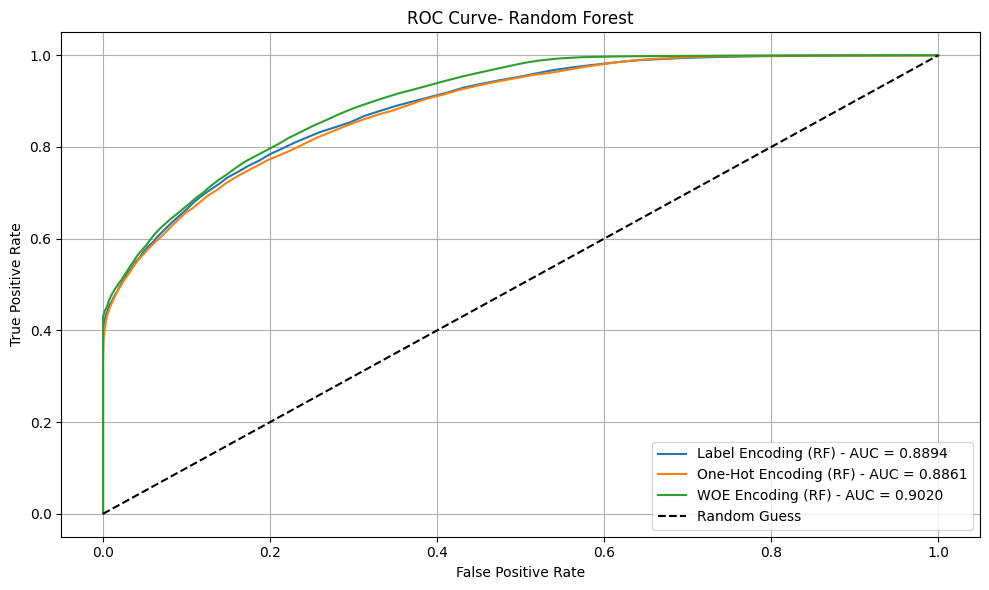

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Label Encoding - Random Forest
y_proba_label_rf = rf_label.predict_proba(X_test_label)[:, 1]
fpr_label_rf, tpr_label_rf, _ = roc_curve(y_test_label, y_proba_label_rf)
auc_label_rf = auc(fpr_label_rf, tpr_label_rf)
plt.plot(fpr_label_rf, tpr_label_rf, label=f"Label Encoding (RF) - AUC = {auc_label_rf:.4f}")

# One-Hot Encoding - Random Forest
y_proba_onehot_rf = rf_onehot.predict_proba(X_test_one_hot)[:, 1]
fpr_onehot_rf, tpr_onehot_rf, _ = roc_curve(y_test_one_hot, y_proba_onehot_rf)
auc_onehot_rf = auc(fpr_onehot_rf, tpr_onehot_rf)
plt.plot(fpr_onehot_rf, tpr_onehot_rf, label=f"One-Hot Encoding (RF) - AUC = {auc_onehot_rf:.4f}")

# WOE Encoding - Random Forest
y_proba_woe_rf = rf_woe.predict_proba(X_test_woe)[:, 1]
fpr_woe_rf, tpr_woe_rf, _ = roc_curve(y_test_woe, y_proba_woe_rf)
auc_woe_rf = auc(fpr_woe_rf, tpr_woe_rf)
plt.plot(fpr_woe_rf, tpr_woe_rf, label=f"WOE Encoding (RF) - AUC = {auc_woe_rf:.4f}")

# Đường Random
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# 🎨 Tuỳ chỉnh
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Light GBM Model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 174444, number of negative: 174444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4815
[LightGBM] [Info] Number of data points in the train set: 348888, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


=== Label Encoding (LightGBM) ===
Accuracy     : 0.8900
AUC          : 0.9100
Gini Index   : 0.8200
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     43582
           1       0.90      0.50      0.64     10658

    accuracy                           0.89     54240
   macro avg       0.89      0.74      0.79     54240
weighted avg       0.89      0.89      0.88     54240

--------------------------------------------------


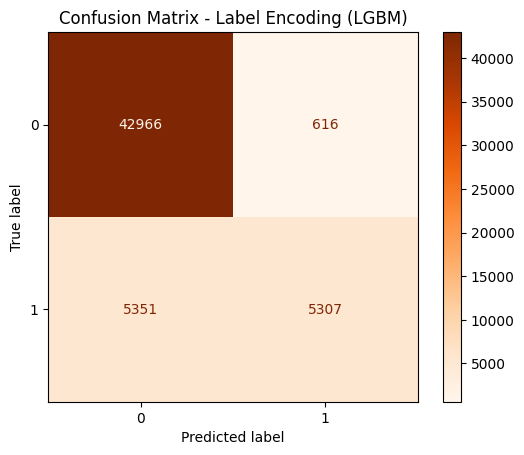

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 174444, number of negative: 174444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4764
[LightGBM] [Info] Number of data points in the train set: 348888, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


=== One-Hot Encoding (LightGBM) ===
Accuracy     : 0.8893
AUC          : 0.9095
Gini Index   : 0.8190
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     43582
           1       0.89      0.50      0.64     10658

    accuracy                           0.89     54240
   macro avg       0.89      0.74      0.79     54240
weighted avg       0.89      0.89      0.88     54240

--------------------------------------------------


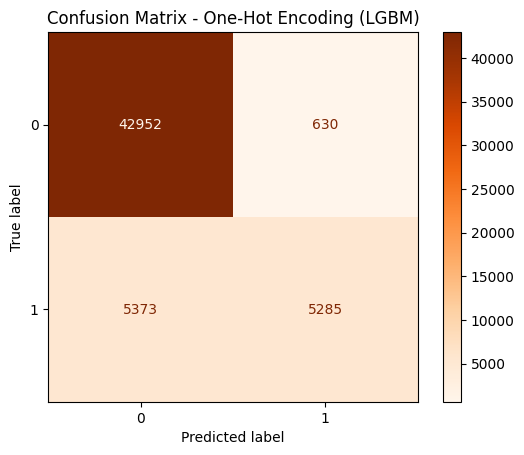

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 174444, number of negative: 174444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4087
[LightGBM] [Info] Number of data points in the train set: 348888, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


=== WOE Encoding (LightGBM) ===
Accuracy     : 0.8901
AUC          : 0.9107
Gini Index   : 0.8213
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     43582
           1       0.91      0.49      0.64     10658

    accuracy                           0.89     54240
   macro avg       0.90      0.74      0.79     54240
weighted avg       0.89      0.89      0.88     54240

--------------------------------------------------


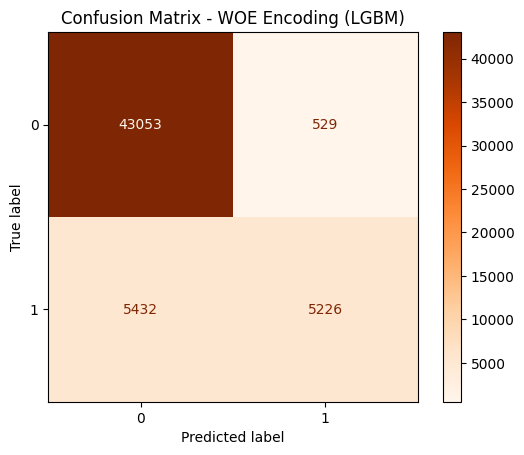

=== Tổng hợp so sánh LightGBM ===
            Encoder  Accuracy     AUC    Gini
0    Label Encoding    0.8900  0.9100  0.8200
1  One-Hot Encoding    0.8893  0.9095  0.8190
2      WOE Encoding    0.8901  0.9107  0.8213


In [ ]:
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score, classification_report,
    roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
)
import matplotlib.pyplot as plt
import pandas as pd

# 🔍 Evaluation function
def evaluate_model_lgb(model, X_test, y_test, encoder_name):
    # Dự đoán xác suất class 1
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred_binary = (y_proba >= 0.5).astype(int)

    # 🎯 Evaluation metrics
    acc = accuracy_score(y_test, y_pred_binary)
    auc_score = roc_auc_score(y_test, y_proba)
    gini = 2 * auc_score - 1

    # Classification report
    print(f"=== {encoder_name} (LightGBM) ===")
    print(f"Accuracy     : {acc:.4f}")
    print(f"AUC          : {auc_score:.4f}")
    print(f"Gini Index   : {gini:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_binary))
    print("-" * 50)

    # 📊 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Oranges')
    plt.title(f"Confusion Matrix - {encoder_name} (LGBM)")
    plt.grid(False)
    plt.show()

    # Trả về dict kết quả
    return {
        "Encoder": encoder_name,
        "Accuracy": acc,
        "AUC": auc_score,
        "Gini": gini
    }

# 🔁 Huấn luyện và đánh giá các mô hình
results_lgb = []

# 1. Label Encoding
lgb_label = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_label.fit(X_train_label, y_train_label)
results_lgb.append(evaluate_model_lgb(lgb_label, X_test_label, y_test_label, "Label Encoding"))

# 2. One-Hot Encoding
lgb_onehot = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_onehot.fit(X_train_one_hot, y_train_one_hot)
results_lgb.append(evaluate_model_lgb(lgb_onehot, X_test_one_hot, y_test_one_hot, "One-Hot Encoding"))

# 3. WOE Encoding
lgb_woe = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_woe.fit(X_train_woe, y_train_woe)
results_lgb.append(evaluate_model_lgb(lgb_woe, X_test_woe, y_test_woe, "WOE Encoding"))

# 📊 Tổng hợp kết quả
results_lgb_df = pd.DataFrame(results_lgb)
print("=== Tổng hợp so sánh LightGBM ===")
print(results_lgb_df.round(4))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


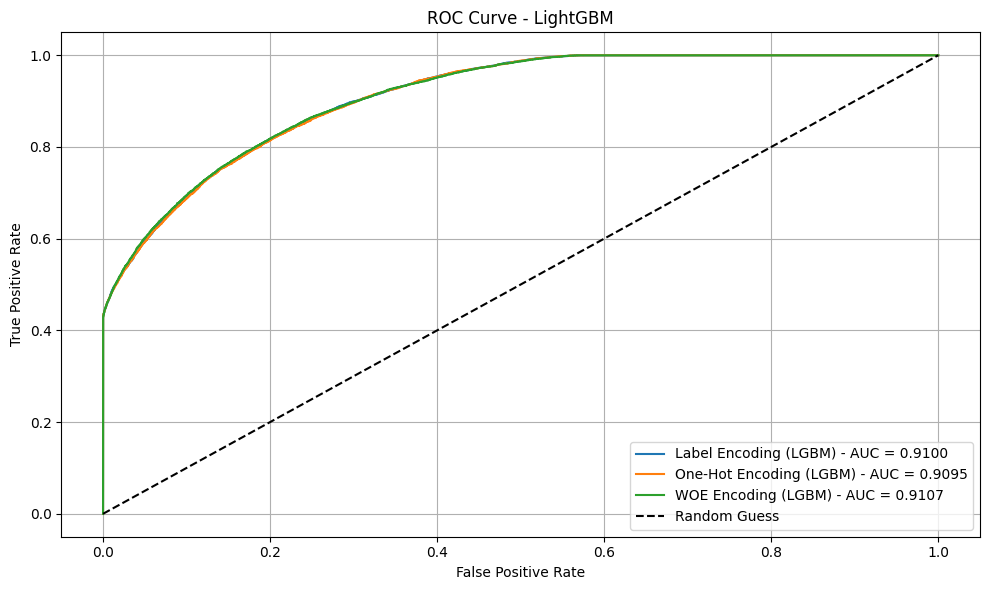

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Label Encoding - LightGBM
y_proba_label_lgb = lgb_label.predict_proba(X_test_label)[:, 1]
fpr_label_lgb, tpr_label_lgb, _ = roc_curve(y_test_label, y_proba_label_lgb)
auc_label_lgb = auc(fpr_label_lgb, tpr_label_lgb)
plt.plot(fpr_label_lgb, tpr_label_lgb, label=f"Label Encoding (LGBM) - AUC = {auc_label_lgb:.4f}")

# One-Hot Encoding - LightGBM
y_proba_onehot_lgb = lgb_onehot.predict_proba(X_test_one_hot)[:, 1]
fpr_onehot_lgb, tpr_onehot_lgb, _ = roc_curve(y_test_one_hot, y_proba_onehot_lgb)
auc_onehot_lgb = auc(fpr_onehot_lgb, tpr_onehot_lgb)
plt.plot(fpr_onehot_lgb, tpr_onehot_lgb, label=f"One-Hot Encoding (LGBM) - AUC = {auc_onehot_lgb:.4f}")

# WOE Encoding - LightGBM
y_proba_woe_lgb = lgb_woe.predict_proba(X_test_woe)[:, 1]
fpr_woe_lgb, tpr_woe_lgb, _ = roc_curve(y_test_woe, y_proba_woe_lgb)
auc_woe_lgb = auc(fpr_woe_lgb, tpr_woe_lgb)
plt.plot(fpr_woe_lgb, tpr_woe_lgb, label=f"WOE Encoding (LGBM) - AUC = {auc_woe_lgb:.4f}")

# Đường Random đoán mò
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# 🎨 Tuỳ chỉnh
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
